In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten 
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VG616
from tensorflow.keras.applications.resnet50 import preprocess_input 
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing. image import ImageDataGenerator, load_img 
from tensorflow.keras.models import Sequential
import numpy as np 
from glob import glob

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession 
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
IMAGE_SIZE = [224,224]
train_path = "Dataset/train"
test_path = "Dataset/test"

In [5]:
resnet=ResNet50(input_shape=IMAGE_SIZE+ [3],weights='imagenet',include_top=False)

In [6]:
for layer in resnet.layers: 
    layer.trainable = False

In [7]:
folders = glob('Dataset/train/*')

In [8]:
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)
model=Model(inputs=resnet.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [11]:
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator (rescale = 1./255,shear_range= 0.2,zoom_range=0.2,horizontal_flip = True)

test_datagen = ImageDataGenerator (rescale = 1./255)

In [13]:
training_set =train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size = 32,class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory(test_path,target_size = (224, 224),batch_size = 32, class_mode= 'categorical')

Found 18 images belonging to 4 classes.


In [15]:
r=model.fit_generator(training_set,validation_data=test_set,epochs=10,steps_per_epoch=len(training_set),validation_steps=len(test_set))

C:\Users\surya\AppData\Local\Temp\ipykernel_21948\1738846400.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(training_set,validation_data=test_set,epochs=10,steps_per_epoch=len(training_set),validation_steps=len(test_set))


Epoch 1/10



SystemError: D:\_w\1\s\Objects\listobject.c:338: bad argument to internal function

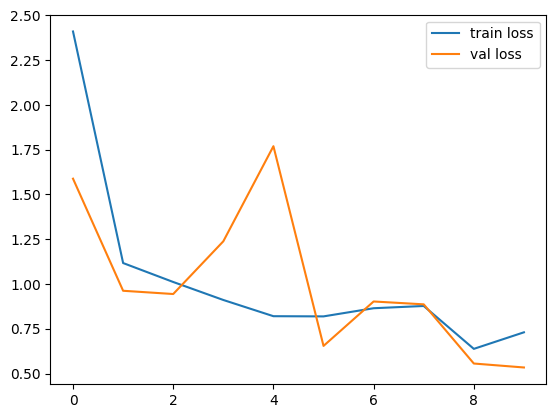

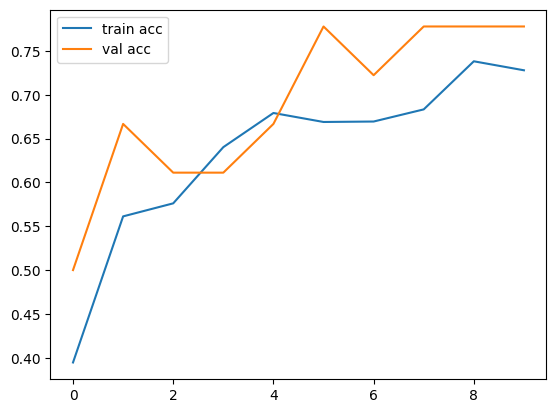

<Figure size 640x480 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.plot(r.history['accuracy'], label='train acc') 
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [26]:

y_pred = model.predict(test_set)


1/1 [==============================] - 3s 3s/step


In [27]:
y_pred

array([[1.0543708e-02, 8.3543569e-01, 5.6025333e-04, 1.5346031e-01],
       [2.1341866e-02, 2.1045212e-01, 5.7262849e-02, 7.1094316e-01],
       [2.1436529e-02, 3.6341711e-03, 9.7006196e-01, 4.8674103e-03],
       [6.8768454e-03, 1.4015765e-01, 1.1693056e-02, 8.4127241e-01],
       [6.3823873e-01, 2.3424248e-01, 2.5416162e-02, 1.0210267e-01],
       [5.3412873e-02, 1.1111024e-02, 8.6946511e-01, 6.6010974e-02],
       [1.2502857e-01, 4.8114902e-01, 1.3793172e-02, 3.8002917e-01],
       [6.9233227e-01, 3.9074454e-05, 3.2358074e-03, 3.0439284e-01],
       [1.0173445e-02, 8.6322302e-01, 4.2936541e-02, 8.3667003e-02],
       [1.1074175e-03, 2.1281208e-05, 9.9147499e-01, 7.3962361e-03],
       [1.3589272e-01, 4.6502519e-01, 2.7727336e-01, 1.2180881e-01],
       [1.0847341e-02, 2.5317895e-01, 3.9140232e-02, 6.9683337e-01],
       [1.6698040e-02, 6.5455371e-01, 4.1779481e-02, 2.8696880e-01],
       [8.7162238e-03, 9.5067489e-01, 3.5549811e-04, 4.0253405e-02],
       [2.4138231e-02, 4.1783627e-

In [28]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [29]:
y_pred

array([1, 3, 2, 3, 0, 2, 1, 0, 1, 2, 1, 3, 1, 1, 3, 0, 2, 2], dtype=int64)

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
model=load_model('model_resnet50.h5')